<a href="https://colab.research.google.com/github/UsmanShafeeq/Advanced-Machine-Learning-Project/blob/Data-set/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
neurocipher_ifood_food_delivery_dataset_path = kagglehub.dataset_download('neurocipher/ifood-food-delivery-dataset')

print('Data source import complete.')


100%|██████████| 64.4k/64.4k [00:00<00:00, 32.2MB/s]

Extracting files...
Data source import complete.


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Importing required modules

In [3]:
import pandas as pd, numpy as np

# Loading the csv file in the form of dataframe using Pandas

In [5]:
df=pd.read_csv("/content/ifood_df.csv")
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


# Exploring the dataset and cleaning it

In [6]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [7]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [9]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [10]:
df.isnull()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [ ]:
# Conclusion: No NaN value in the dataset.

# Descriptive Statistics

In [12]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [13]:
print(f"The average income is : {df['Income'].mean()}")
print(f"The average age of the customer is : {df['Age'].mean()}")

The average income is : 51622.0947845805
The average age of the customer is : 51.09569160997732


In [14]:
#Marital Status and its analysis
#=================================
lst=[]
for i in range(len(df.columns)):
    if i>=(list(df.columns).index("marital_Divorced")) and i<=(list(df.columns).index("marital_Divorced"))+4:
        lst.append(df.columns[i])
print(df[lst])
print("*"*40)

dic={i:df[i].sum() for i in lst}
for i in dic:
    print(f"The total number of {i} is {dic[i]}")
print("*"*40)

amax,key=-1,""
for j in dic:
    if dic[j]>amax:
        amax=dic[j]
        key=j
print(f"The highest category is {key} with {amax} individuals.")#Mode of the data wrt Marital Status.

      marital_Divorced  marital_Married  marital_Single  marital_Together  \
0                    0                0               1                 0   
1                    0                0               1                 0   
2                    0                0               0                 1   
3                    0                0               0                 1   
4                    0                1               0                 0   
...                ...              ...             ...               ...   
2200                 0                1               0                 0   
2201                 0                0               0                 1   
2202                 1                0               0                 0   
2203                 0                0               0                 1   
2204                 0                1               0                 0   

      marital_Widow  
0                 0  
1                 0  
2        

In [15]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [16]:
#Educational Status and its analysis
#=======================================

temp,index=list(df.columns),0
for i in  temp:
    if i=="education_2n Cycle":
        break
    else:
        index+=1
df2=df[(df.columns)[index:index+5:]]
print(df2)

df3=df2.columns
dic1={}
for i in df3:
    dic1[i]=df2[i].sum()
print("*"*40)

for i in dic1:
    print(f"The total number of {i} is {dic1[i]}")
print("*"*40)

amax,key=-1,""
for j in dic1:
    if dic1[j]>amax:
        amax=dic1[j]
        key=j
print(f"The highest category is {key} with {amax} individuals.")#Mode of the data wrt Educational Status.

      education_2n Cycle  education_Basic  education_Graduation  \
0                      0                0                     1   
1                      0                0                     1   
2                      0                0                     1   
3                      0                0                     1   
4                      0                0                     0   
...                  ...              ...                   ...   
2200                   0                0                     1   
2201                   0                0                     0   
2202                   0                0                     1   
2203                   0                0                     0   
2204                   0                0                     0   

      education_Master  education_PhD  
0                    0              0  
1                    0              0  
2                    0              0  
3                    0             

In [17]:
#Note: Highest value is actually the mode of the given data.

In [18]:
#Amount of dis-satisfaction among the consumer
#===============================================
complaints=df["Complain"].sum()
total_customer=df["Complain"].count()

print(f"{(complaints/total_customer)*100} percent of the customers are not initially satisfied.")

0.9070294784580499 percent of the customers are not initially satisfied.


In [19]:
#Total money raised in the business
#====================================
print(f"Total money raised is : {df['MntTotal'].sum()}")

Total money raised is : 1240896


In [20]:
#Checking data legitimacy
#============================
temp,index=list(df.columns),-1
for i in range(len(temp)):
    if temp[i]=="AcceptedCmp3":
        index=i
df2=df[temp[index:index+5]]
df3=df2.sum(axis=1)==df["AcceptedCmpOverall"]

for i in df3:
    if i==True:
        pass
    else:
        print("There is some mistake in the dataset")
        break
print("There is no mistake in the dataset")

There is no mistake in the dataset


# Customer Segmentation

#  1] Wealth Across the Years: A Clustering Approach to Age-Based Spending Habits

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

print(df.columns)

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')


In [22]:
features=["Income","Age"]

df[features]

,Income,Age
0,58138.0,63
1,46344.0,66
2,71613.0,55
3,26646.0,36
4,58293.0,39
...,...,...
2200,61223.0,53
2201,64014.0,74
2202,56981.0,39
2203,69245.0,64


In [23]:
#Standard Values corresponding to the features in the dataframe
#=================================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
print(f"Standard Values are : \n{'*'*40}\n{X_scaled}")
print("*"*40)

# Applying the KMeans Clustering
#=====================================
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
print(kmeans.labels_)
print("*"*40)

# Add cluster labels to original dataframe
#============================================
df['Cluster_1'] = kmeans.labels_

#Interpreting the non-moving centroids
#=========================================
centroids_scaled= kmeans.cluster_centers_
centroids_real = scaler.inverse_transform(centroids_scaled)
centroid_df = pd.DataFrame(centroids_real, columns=features)
print(f"The centroids value on real scale is : \n{centroid_df}")
print("*"*40)
segment_names = {
    0: "Highest Income and Slightly older",
    1: "Lowest Income and Youngest",
    2: "Medium Income and the oldest",
}

df["income_Age_Relationship"]=df['Cluster_1'].map(segment_names)
print(f"The updated dataframe is : \n{df}\n{'*'*40}")

Standard Values are : 
****************************************
[[ 0.31465086  1.01718872]
 [-0.25487741  1.27353005]
 [ 0.96535404  0.33361186]
 ...
 [ 0.25877972 -1.03354187]
 [ 0.85100412  1.10263583]
 [ 0.06021263  1.27353005]]
****************************************
[2 2 0 ... 0 2 2]
****************************************
The centroids value on real scale is : 
         Income        Age
0  70356.021452  44.387789
1  31561.121749  44.371158
2  59084.011952  64.049137
****************************************
The updated dataframe is : 
       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...    

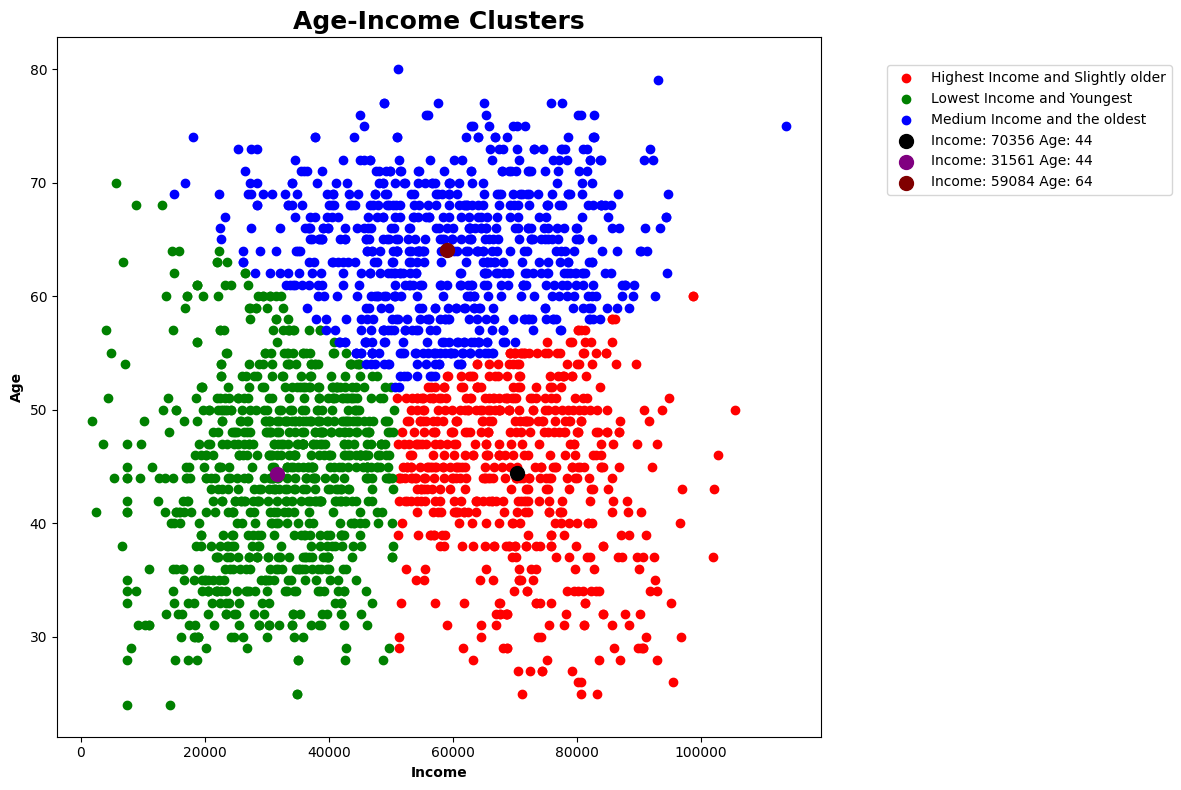

In [24]:
#Visual Representation
#========================
import matplotlib.pyplot as plt
colours=["red","green","blue"]
plt.figure(figsize=(12,8))

new_dataFrame=df[['Income', 'Age',"Cluster_1"]]

for i in range(3):
    hold=new_dataFrame[new_dataFrame["Cluster_1"]==i]
    plt.scatter(hold["Income"],hold["Age"],color=colours[i],label=f"{df[df['Cluster_1'] == i]['income_Age_Relationship'].iloc[0]}")
#Plotting the non-moving centroids
#===================================
colours=["black","purple","maroon"]

for i in range(3):
    temp=centroid_df[centroid_df.index==i]
    plt.scatter(temp["Income"],temp["Age"],s=100,c=colours[i],label=f"Income: {int(temp['Income'].iloc[0])} Age: {int(temp['Age'].iloc[0])}")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=2,fontsize=10)
plt.xlabel("Income",fontweight='bold')
plt.ylabel("Age",fontweight='bold')
plt.title("Age-Income Clusters",fontweight='bold',fontsize=18)
plt.tight_layout()
plt.show()

In [25]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'Cluster_1', 'income_Age_Relationship'],
      dtype='object')

# 2] Demographic-Based Clustering: Age vs Marital Status

In [26]:
#Features we are considering for establishing relationship
#===========================================================
features=["Age","marital_Divorced","marital_Married",
       "marital_Single", "marital_Together", "marital_Widow"]

In [27]:
df[features]

,Age,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow
0,63,0,0,1,0,0
1,66,0,0,1,0,0
2,55,0,0,0,1,0
3,36,0,0,0,1,0
4,39,0,1,0,0,0
...,...,...,...,...,...,...
2200,53,0,1,0,0,0
2201,74,0,0,0,1,0
2202,39,1,0,0,0,0
2203,64,0,0,0,1,0


In [28]:
#Standard Values corresponding to the features in the dataframe
#=================================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
print(f"Standard Values are : \n{'*'*40}\n{X_scaled}")
print("*"*40)

#Using kMean to build up clusters
#===================================
kmean=KMeans(n_clusters=len(features)-1,random_state=42)
kmean.fit(X_scaled)

print(f"The labels are : \n{np.unique(kmean.labels_)}")
print("*"*40)

#Introspecting the non-moving centroids
#========================================

centroids_scaled= kmean.cluster_centers_
centroids_real = scaler.inverse_transform(centroids_scaled)
centroid_df = pd.DataFrame(centroids_real, columns=features)
print(f"The centroids value on real scale is : \n{centroid_df}")

#Encoding System defined
#=========================
dict_2={
    0: 'marital_Together',
    1: 'marital_Married',
    2: 'marital_Single',
    3: 'marital_Divorced',
    4: 'marital_Widow'
}

#Adding cluster to the original dataframe
#=========================================
df["Cluster_2"]=kmean.labels_
df["age_Marital_Status_Relationship"]=df["Cluster_2"].map(dict_2)

print(f"The final dataferame is : \n{'*'*40}")
df

Standard Values are : 
****************************************
[[ 1.01718872 -0.34125606 -0.79506248  1.90332381 -0.58904684 -0.18893785]
 [ 1.27353005 -0.34125606 -0.79506248  1.90332381 -0.58904684 -0.18893785]
 [ 0.33361186 -0.34125606 -0.79506248 -0.52539668  1.69765787 -0.18893785]
 ...
 [-1.03354187  2.93035092 -0.79506248 -0.52539668 -0.58904684 -0.18893785]
 [ 1.10263583 -0.34125606 -0.79506248 -0.52539668  1.69765787 -0.18893785]
 [ 1.27353005 -0.34125606  1.25776278 -0.52539668 -0.58904684 -0.18893785]]
****************************************
The labels are : 
[0 1 2 3 4]
****************************************
The centroids value on real scale is : 
         Age  marital_Divorced  marital_Married  marital_Single  \
0  52.184859     -1.262879e-15    -3.830269e-15   -1.332268e-15   
1  50.426230     -1.484923e-15     1.000000e+00   -1.526557e-15   
2  48.234801     -1.124101e-15    -2.664535e-15    1.000000e+00   
3  53.473913      1.000000e+00     0.000000e+00   -6.661338e

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Cluster_1,income_Age_Relationship,Cluster_2,age_Marital_Status_Relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,0,0,1529,1441,0,2,Medium Income and the oldest,2,marital_Single
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,0,0,21,15,0,2,Medium Income and the oldest,2,marital_Single
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,734,692,0,0,Highest Income and Slightly older,0,marital_Together
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,48,43,0,1,Lowest Income and Youngest,0,marital_Together
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,1,407,392,0,0,Highest Income and Slightly older,1,marital_Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,1,0,0,1094,847,0,0,Highest Income and Slightly older,1,marital_Married
2201,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,1,436,428,1,2,Medium Income and the oldest,0,marital_Together
2202,56981.0,0,0,91,908,48,217,32,12,24,...,1,0,0,1217,1193,1,0,Highest Income and Slightly older,3,marital_Divorced
2203,69245.0,0,1,8,428,30,214,80,30,61,...,0,1,0,782,721,0,2,Medium Income and the oldest,0,marital_Together


In [29]:
df["Age"]

,Age
0,63
1,66
2,55
3,36
4,39
...,...
2200,53
2201,74
2202,39
2203,64


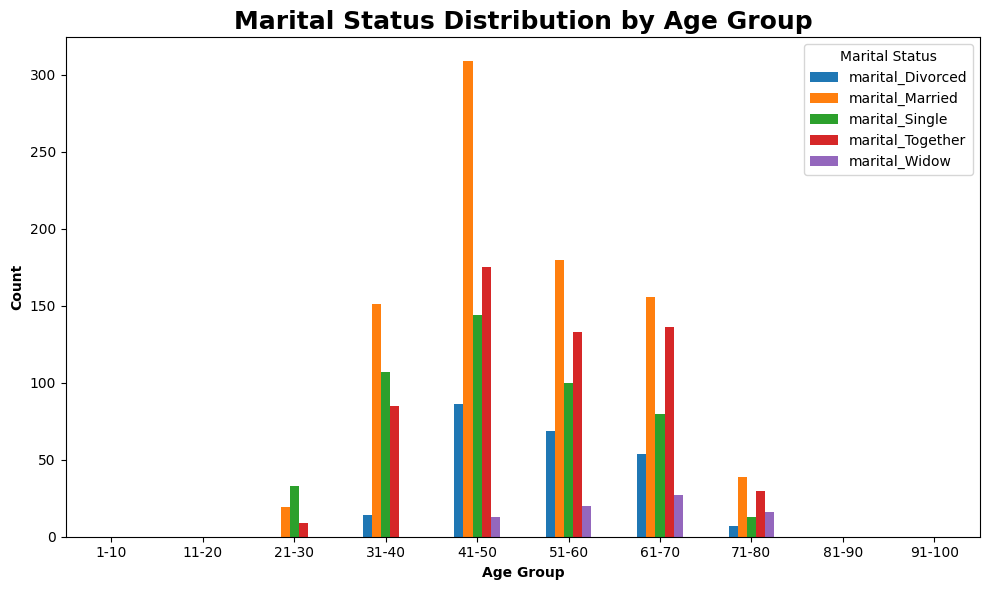

In [30]:
#Visual representation of the relationship
#===========================================

hold=["marital_Divorced","marital_Married","marital_Single", "marital_Together", "marital_Widow"]
df["Age_Group"]=pd.cut(df["Age"],bins=[0,10,20,30,40,50,60,70,80,90,100],labels=['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100'])

#Filtered data for plotting
#=============================
data_1=df.groupby(['Age_Group',"age_Marital_Status_Relationship"],observed=False).size().unstack(fill_value=0)
data_1=data_1.reset_index()

#Plotting the actual data
#==========================
data_1.plot(kind="bar",x="Age_Group",figsize=(10,6))
plt.title('Marital Status Distribution by Age Group',fontweight='bold',fontsize=18)
plt.xlabel('Age Group',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()

# 3] Customer Segmentation by Income and Education Level

In [31]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'Cluster_1', 'income_Age_Relationship',
       'Cluster_2', 'age_Marital_Status_Relationship', 'Age_Group'],
      dtype='object')

In [32]:
features=['education_2n Cycle', 'education_Basic', 'education_Graduation',
          'education_Master', 'education_PhD', 'Income']
df[features]

,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,Income
0,0,0,1,0,0,58138.0
1,0,0,1,0,0,46344.0
2,0,0,1,0,0,71613.0
3,0,0,1,0,0,26646.0
4,0,0,0,0,1,58293.0
...,...,...,...,...,...,...
2200,0,0,1,0,0,61223.0
2201,0,0,0,0,1,64014.0
2202,0,0,1,0,0,56981.0
2203,0,0,0,1,0,69245.0


In [33]:
#Standard Values corresponding to the features in the dataframe
#==================================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
print(f"Standard Values are : \n{'*'*40}\n{X_scaled}")
print("*"*40)

#Using kMean to build up clusters
#===================================
kmean=KMeans(n_clusters=len(features)-1,random_state=42)
kmean.fit(X_scaled)

print(f"The labels are : \n{np.unique(kmean.labels_)}")
print("*"*40)
df["Cluster_3"]=kmean.labels_

#Introspecting the non-moving centroids
#========================================

centroids_scaled= kmean.cluster_centers_
centroids_real = scaler.inverse_transform(centroids_scaled)
centroid_df = pd.DataFrame(centroids_real, columns=features)
print(f"The centroids value on real scale is : \n{centroid_df}")
print("*"*40)

#Encoding scheme defined
#=========================
dict_3={
    0:"education_Graduation",
    1:"education_PhD",
    2:"education_Master",
    3:"education_2n Cycle",
    4:"education_Basic"
}

#Mapping the Cluster and Encoding Scheme
#========================================
df["Educational_Classification"]=df["Cluster_3"].map(dict_3)
centroid_df=centroid_df.reset_index()
centroid_df=centroid_df.rename(columns={"index":"Cluster_3"})
centroid_df["educational_Status"]=centroid_df["Cluster_3"].map(dict_3)

centroid_df

Standard Values are : 
****************************************
[[-0.31409347 -0.15844432  0.99052111 -0.44465563 -0.52469386  0.31465086]
 [-0.31409347 -0.15844432  0.99052111 -0.44465563 -0.52469386 -0.25487741]
 [-0.31409347 -0.15844432  0.99052111 -0.44465563 -0.52469386  0.96535404]
 ...
 [-0.31409347 -0.15844432  0.99052111 -0.44465563 -0.52469386  0.25877972]
 [-0.31409347 -0.15844432 -1.0095696   2.24893137 -0.52469386  0.85100412]
 [-0.31409347 -0.15844432 -1.0095696  -0.44465563  1.90587328  0.06021263]]
****************************************
The labels are : 
[0 1 2 3 4]
****************************************
The centroids value on real scale is : 
   education_2n Cycle  education_Basic  education_Graduation  \
0        1.984524e-15     9.367507e-17          1.000000e+00   
1        1.249001e-16     9.020562e-17          5.107026e-15   
2       -4.302114e-16     7.979728e-17          4.440892e-15   
3        1.000000e+00     6.591949e-17          2.442491e-15   
4       

,Cluster_3,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,Income,educational_Status
0,0,1.984524e-15,9.367507e-17,1.000000e+00,1.609823e-15,2.692291e-15,51984.008086,education_Graduation
1,1,1.249001e-16,9.020562e-17,5.107026e-15,-1.665335e-15,1.000000e+00,55220.581933,education_PhD
2,2,-4.302114e-16,7.979728e-17,4.440892e-15,1.000000e+00,-1.276756e-15,52629.579670,education_Master
3,3,1.000000e+00,6.591949e-17,2.442491e-15,3.330669e-16,5.828671e-16,47625.333333,education_2n Cycle
4,4,0.000000e+00,1.000000e+00,0.000000e+00,1.387779e-16,3.053113e-16,20306.259259,education_Basic


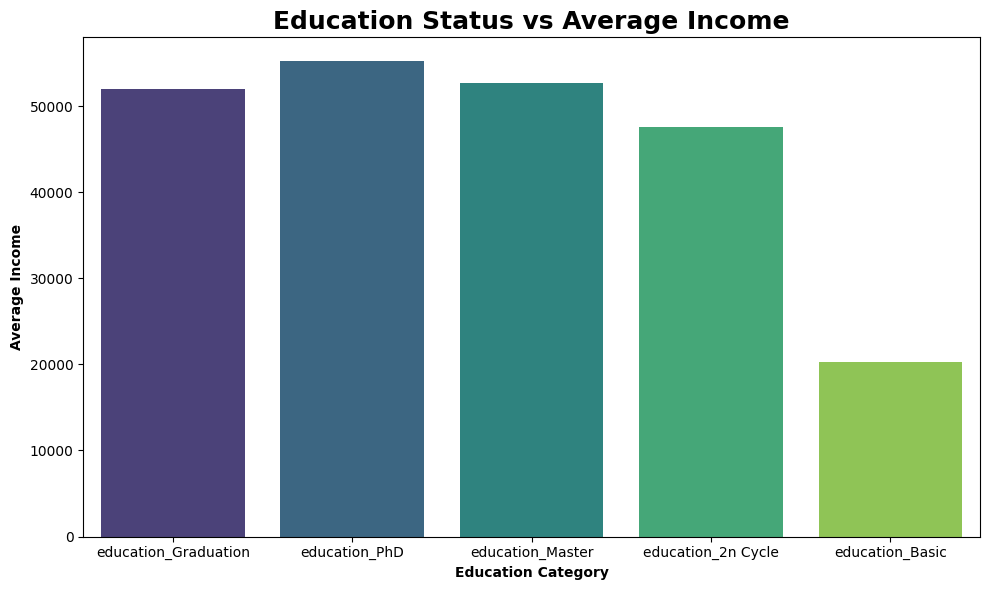

In [34]:
#Visual representation of the categorisation
#==============================================
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(data=centroid_df, x="educational_Status", y="Income", hue="educational_Status", palette="viridis")
plt.title("Education Status vs Average Income",fontweight='bold',fontsize=18)
plt.xlabel("Education Category",fontweight='bold')
plt.ylabel("Average Income",fontweight='bold')
plt.tight_layout()
plt.show()

# 4] Educational disparty in the customers

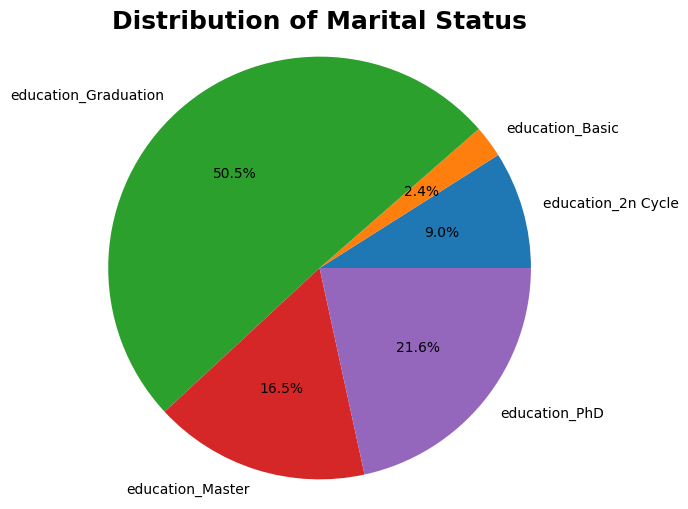

In [35]:
#Visual Representation
#=======================

labels=features[0:5]
values=[df[i].sum() for i in labels]

# Plotting the Graph
#========================

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Marital Status',fontweight='bold',fontsize=18)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Insights and Recommendations

[![image.png](attachment:63105243-170a-419a-877e-5126e612326e.png)](http://)

# Thank You :)